# Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
fraud=pd.read_csv(r"E:\assignments csv  files\Fraud_check.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [7]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
fraud.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"},inplace=True)

In [10]:
fraud.head()

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [11]:
fraud.columns

Index(['Undergrad', 'marital_status', 'taxable_income', 'city_population',
       'work_experience', 'Urban'],
      dtype='object')

In [12]:
fraud.marital_status.value_counts()

Single      217
Married     194
Divorced    189
Name: marital_status, dtype: int64

In [13]:
fraud.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [14]:
fraud.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [15]:
fraud1=fraud.copy()
list=[]
for i in range(0,len(fraud)):
  if fraud["taxable_income"][i]<=30000:
    list.append("Risky")
  elif fraud["taxable_income"][i]>30000:
    list.append("Good")
fraud1["loan_type"]=list
fraud1      

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [16]:
fraud1.loan_type.value_counts()

Good     476
Risky    124
Name: loan_type, dtype: int64

In [17]:
categorical_feature=[feature for feature in fraud1.columns if fraud1[feature].dtype=="O"]
categorical_feature

['Undergrad', 'marital_status', 'Urban', 'loan_type']

In [18]:
numerical_feature=[feature for feature in fraud1.columns if fraud1[feature].dtype!="O"]
numerical_feature

['taxable_income', 'city_population', 'work_experience']

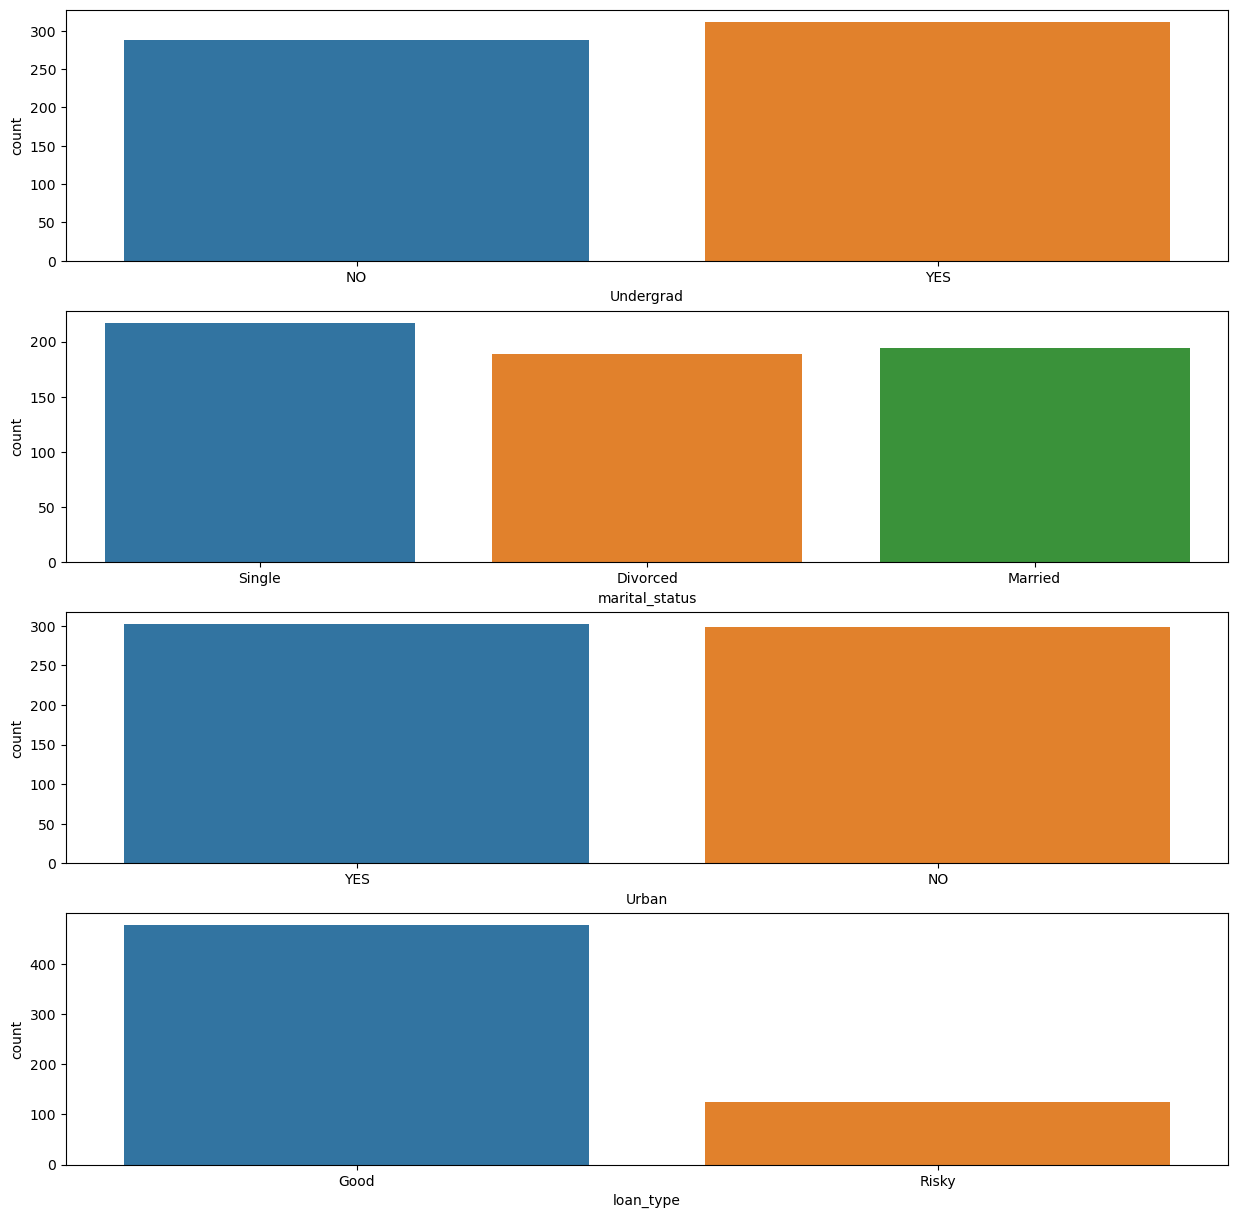

In [19]:
fig,ax=plt.subplots(len(categorical_feature),1,figsize=(15,15))
for i in range (0, len(categorical_feature)):
    sns.countplot(x=categorical_feature[i],ax=ax[i],data=fraud1)

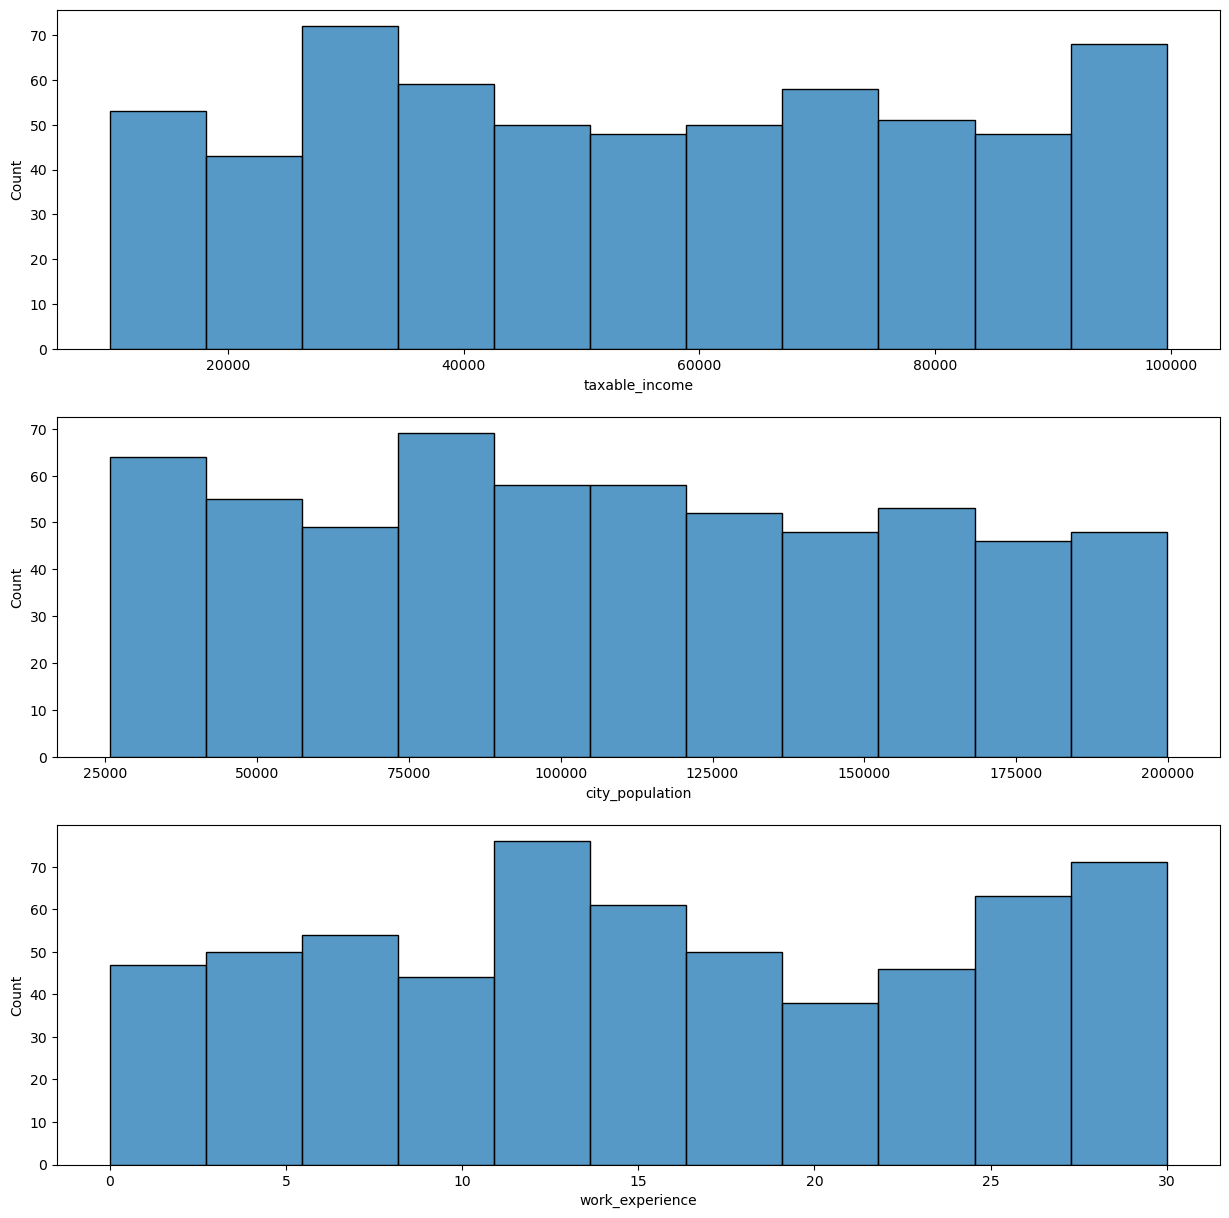

In [20]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(15,15))
for i in range(0,len(numerical_feature)):
  sns.histplot(x=numerical_feature[i],ax=ax[i],data=fraud1)

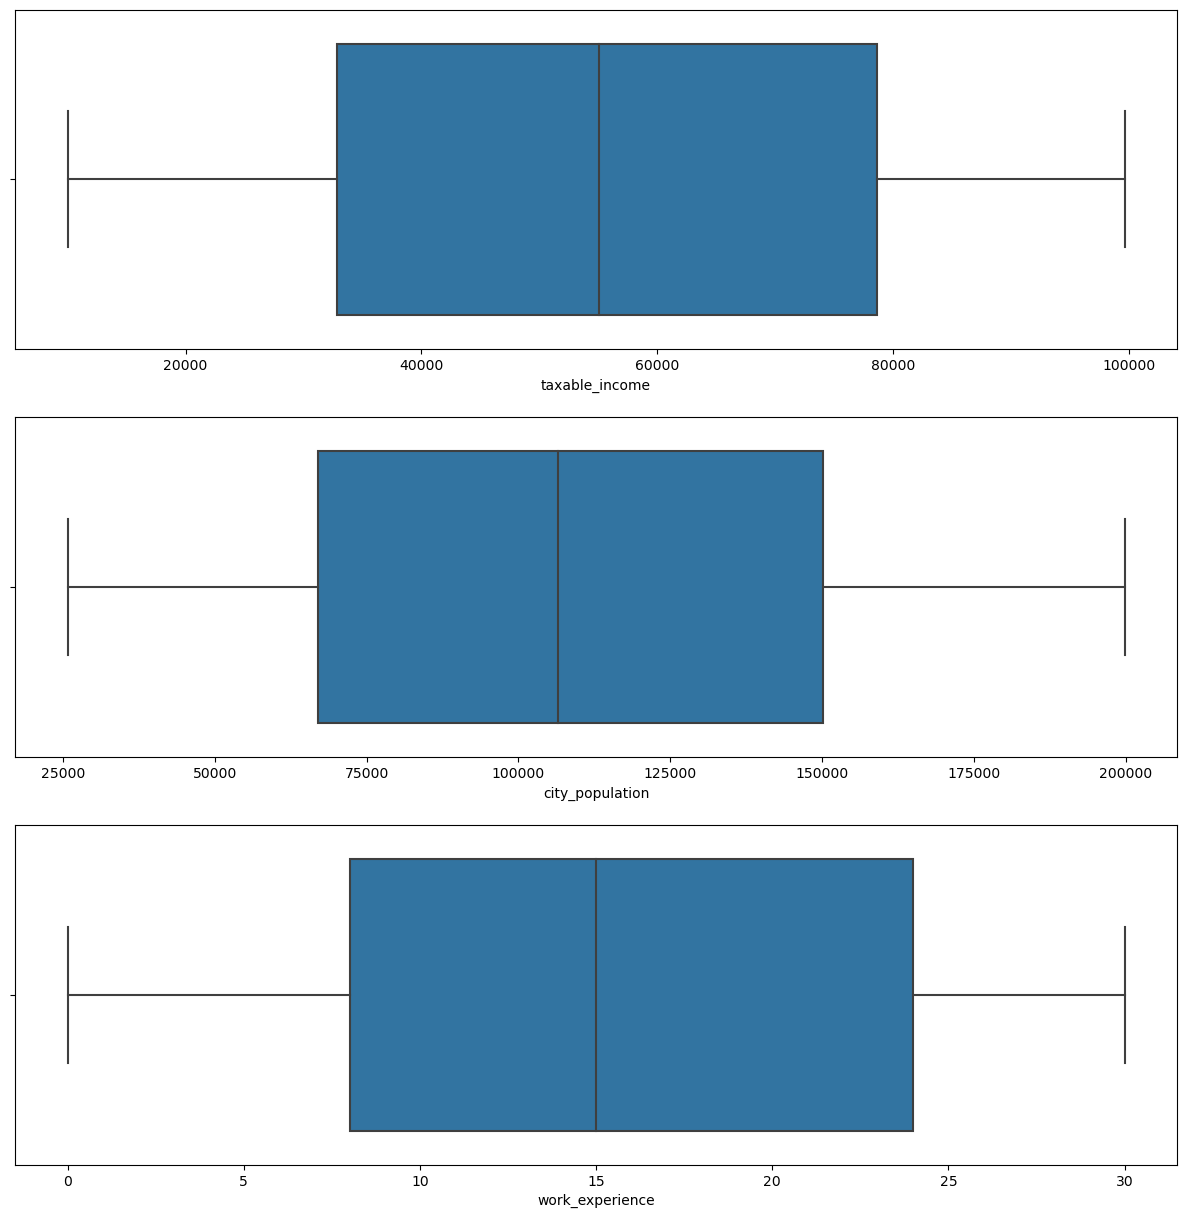

In [21]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(15,15))
for i in range(0,len(numerical_feature)):
  sns.boxplot(x=numerical_feature[i],ax=ax[i],data=fraud1)

In [22]:
loan_asset_risky=pd.DataFrame()
loan_asset_good=pd.DataFrame()

loan_asset_risky=fraud1.loc[fraud1["loan_type"]=="Risky"]
loan_asset_good=fraud1.loc[fraud1["loan_type"]=="Good"]

In [23]:
loan_asset_risky

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
10,NO,Single,29732,102602,19,YES,Risky
12,NO,Divorced,11794,148033,14,YES,Risky
16,YES,Divorced,24987,34551,29,NO,Risky
19,NO,Single,10987,126953,30,YES,Risky
21,YES,Divorced,14310,29106,7,YES,Risky
...,...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES,Risky
557,YES,Married,12810,157421,10,NO,Risky
567,YES,Single,16316,129912,30,NO,Risky
575,NO,Divorced,10735,95975,13,YES,Risky


In [24]:
loan_asset_good

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [25]:
fraud1.drop(["taxable_income"],inplace=True,axis=1)

In [26]:
fraud1

,Undergrad,marital_status,city_population,work_experience,Urban,loan_type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


KeyError: 'taxable_income'

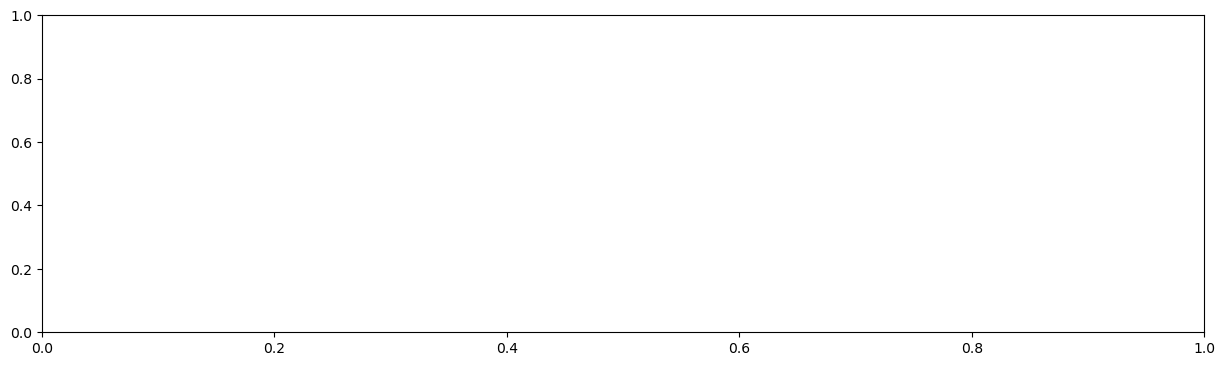

In [27]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['taxable_income'], bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
plt.title('Taxable.Income of those with high risk')
plt.subplot(3,1,2)
plt.hist(loan_asset_good['taxable_income'],  bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
plt.title('taxable_income of those with no risk',)
income_describe = pd.DataFrame()
income_describe['Taxable.Income of those with high risk'] = loan_asset_risky['taxable_income'].describe()
income_describe['Taxable.Income of those with no risk'] = loan_asset_good['taxable_income'].describe()
income_describe  = income_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
income_describe.plot.bar()
plt.show() 
     

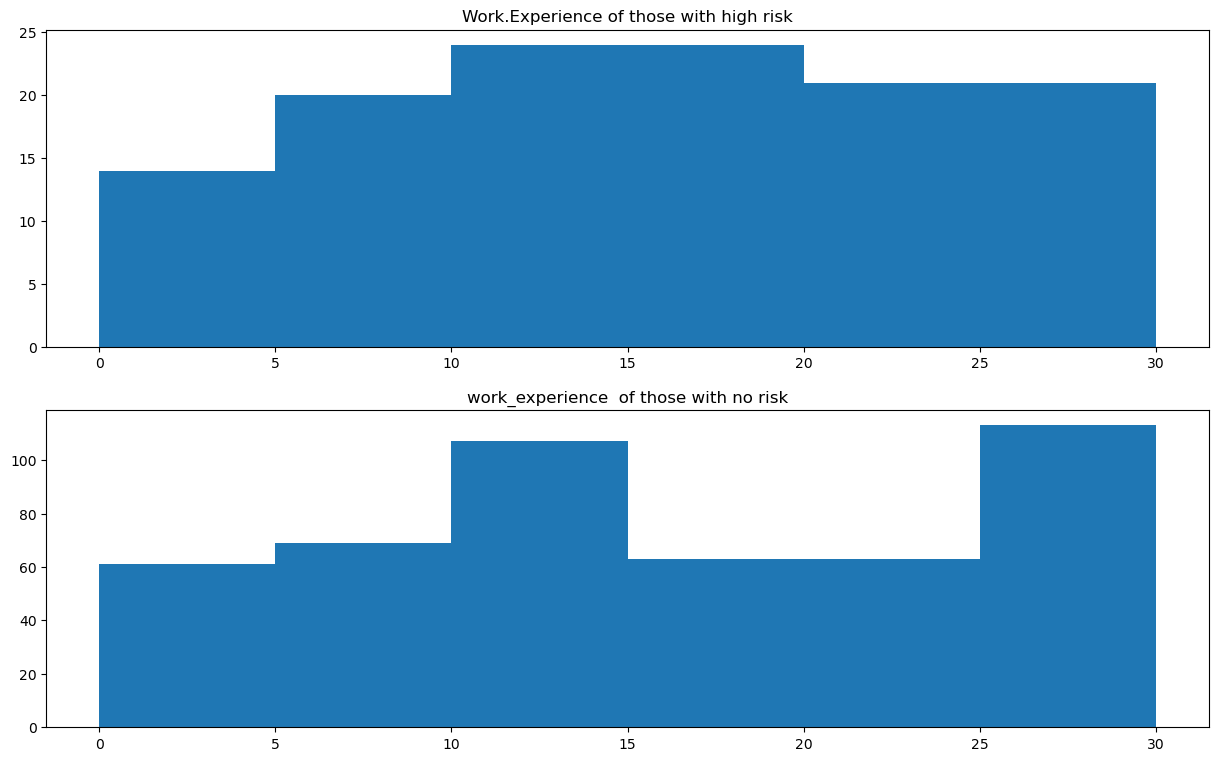

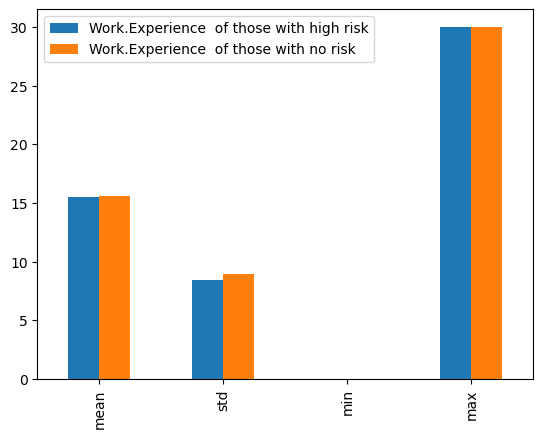

In [28]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['work_experience'], bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.title('Work.Experience of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['work_experience'],  bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.title('work_experience  of those with no risk',)



exp_describe = pd.DataFrame()

exp_describe['Work.Experience  of those with high risk'] = loan_asset_risky['work_experience'].describe()
exp_describe['Work.Experience  of those with no risk'] = loan_asset_good['work_experience'].describe()
exp_describe = exp_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
exp_describe.plot.bar()

plt.show() 

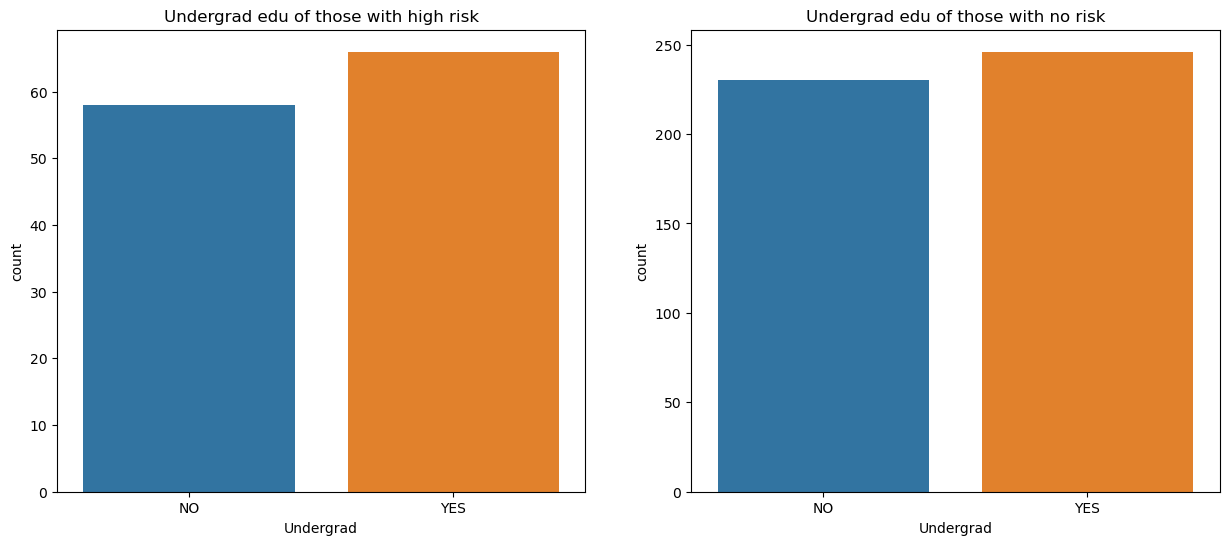

In [29]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(data=loan_asset_risky,x='Undergrad')
plt.title('Undergrad edu of those with high risk')

plt.subplot(1,2,2)
sns.countplot(data=loan_asset_good,x='Undergrad')
plt.title('Undergrad edu of those with no risk')

plt.show()

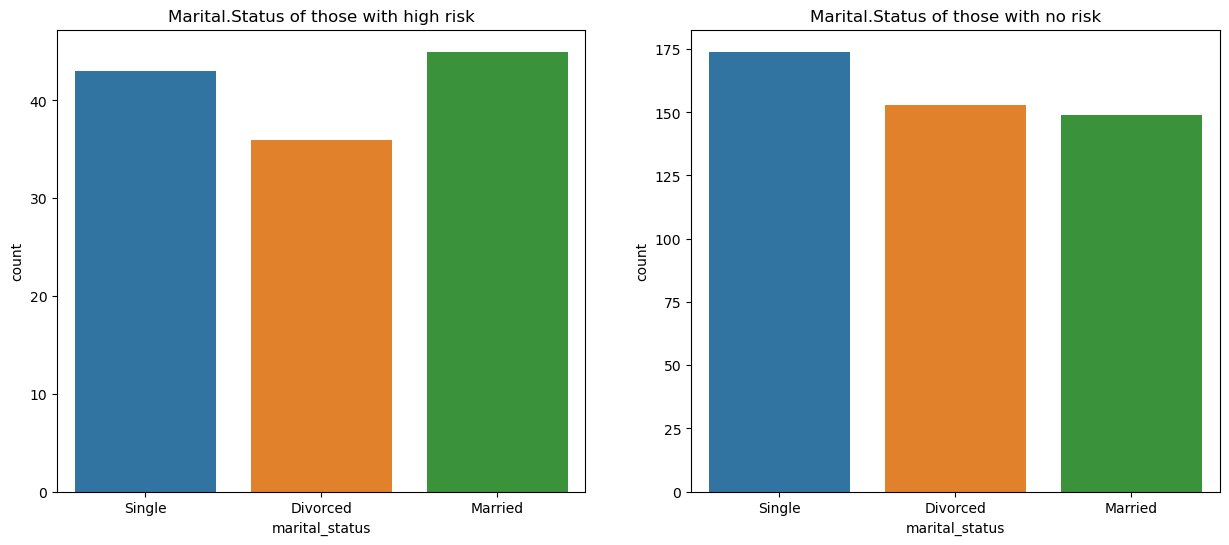

In [30]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(x="marital_status",data=loan_asset_risky)
plt.title('Marital.Status of those with high risk')

plt.subplot(1,2,2)
sns.countplot(x='marital_status',data=loan_asset_good)
plt.title('Marital.Status of those with no risk',)

plt.show()

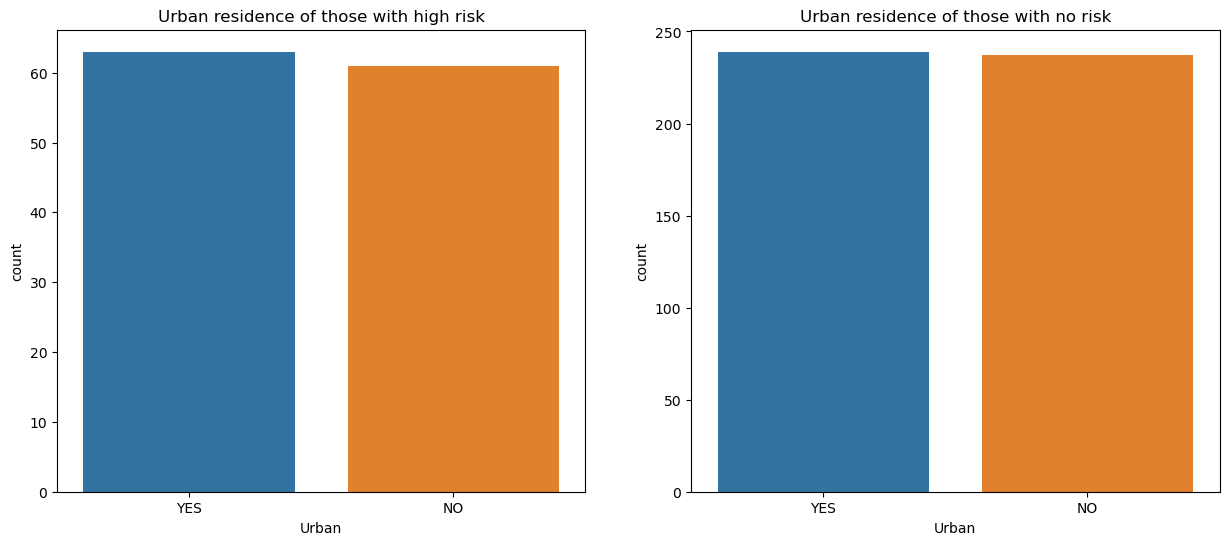

In [31]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(data=loan_asset_risky,x='Urban')
plt.title('Urban residence of those with high risk')

plt.subplot(1,2,2)
sns.countplot(data=loan_asset_good,x='Urban')
plt.title('Urban residence of those with no risk',)

plt.show()

In [32]:
x=fraud1.iloc[:,:-1]
y=fraud1.iloc[:,-1]

In [33]:
x.head()

,Undergrad,marital_status,city_population,work_experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


In [34]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: loan_type, dtype: object

In [35]:
x=pd.get_dummies(x)

In [36]:
x.head()

,city_population,work_experience,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [37]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [40]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (420, 9)
x_test (180, 9)
y_train (420,)
y_test (180,)


In [41]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [42]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
cart=DecisionTreeClassifier()
num_tree=100
model=BaggingClassifier(estimator=cart,n_estimators=num_tree,random_state=7)
result=cross_val_score(model,x,y,cv=kfold)

In [43]:
print(result.mean())

0.745


In [44]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
kfold=KFold(n_splits=10,random_state=10,shuffle=True)
num_tree=100
max_feature=5
model=RandomForestClassifier(n_estimators=num_tree,max_features=max_feature)
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7483333333333333


In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier()

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(x, y) 

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
model_kf =grid.best_estimator_
model_kf.fit(x, y)

results = cross_val_score(model_kf, x, y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))   

In [ ]:
#ada boost classification
from sklearn.ensemble import AdaBoostClassifier
kfold=KFold(n_splits=5,random_state=7,shuffle=True)
model=AdaBoostClassifier(n_estimators=100,random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())